In [69]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
%matplotlib inline

import requests
from io import StringIO

In [35]:
# Loading data into dataframe from url

import requests
from io import StringIO

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
response = requests.get(url)
response.raise_for_status()  #Raises an error when requests fails

df = pd.read_csv(StringIO(response.text))
df.head()

Region      Date  Estimated_fire_area  Mean_estimated_fire_brightness  \
0    NSW  1/4/2005              8.68000                      312.266667   
1    NSW  1/5/2005             16.61125                      322.475000   
2    NSW  1/6/2005              5.52000                      325.266667   
3    NSW  1/7/2005              6.26400                      313.870000   
4    NSW  1/8/2005              5.40000                      337.383333   

   Mean_estimated_fire_radiative_power  Mean_confidence  Std_confidence  \
0                            42.400000        78.666667        2.886751   
1                            62.362500        85.500000        8.088793   
2                            38.400000        78.333333        3.214550   
3                            33.800000        92.200000        7.529940   
4                           122.533333        91.000000        7.937254   

   Var_confidence  Count Replaced  
0        8.333333      3        R  
1       65.428571      8        R  
2       10.333333      3        R  
3       56.700000      5        R  
4       63.000000      3        R

In [37]:
# Loading Data from dataframe "df" to csv
df.to_csv('../../data/Australia_Wildfire/Australia_Wildfire.csv', index=False)

In [4]:
# Checking the data types of the columns
df.columns
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [5]:
# Formatting date and time
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [18]:
# Plotting Figure by Estimated Fire Area Over Time

# Grouping and calculating the mean
df_new = df.groupby('Year')['Estimated_fire_area'].mean().reset_index()

# Creating an interactive line chart
fig = px.line(
    df_new,
    x='Year',
    y='Estimated_fire_area',
    title='Estimated Fire Area Over Time',
    markers=True,
    labels={'Estimated_fire_area': 'Average Estimated Fire Area (km²)'}
)

# Optional styling
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Avg. Fire Area (km²)',
    title_font_size=20,
    height=700,
    width=1100
)

fig.show()
plt.savefig('../../reports/australia_wildfire/Estimated_Fire_Area_Over_Time_Year.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [23]:
# Grouping the data by both 'Year' and 'Month', and calculating the mean of 'Estimated_fire_area'
df_new = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean().reset_index()

# Create a datetime column for proper time series plotting
df_new['Date'] = pd.to_datetime(df_new[['Year', 'Month']].assign(DAY=1))

# Create an interactive line plot
fig = px.line(
    df_new,
    x='Date',
    y='Estimated_fire_area',
    title='Estimated Fire Area Over Time (Monthly)',
    labels={'Date': 'Date (Year-Month)', 'Estimated_fire_area': 'Avg. Estimated Fire Area (km²)'},
    markers=True
)

# Customize layout for a clean look
fig.update_layout(
    width=1200,
    height=600,
    template='plotly_white',
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    hoverlabel=dict(font_size=14),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

fig.show()

plt.savefig('../../reports/australia_wildfire/Estimated_Fire_Area_Over_Time.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [24]:
# Group the data by Region and calculate the mean fire brightness
region_brightness = df.groupby('Region')['Mean_estimated_fire_brightness'].mean().reset_index()

# Create interactive bar plot
fig = px.bar(
    region_brightness,
    x='Region',
    y='Mean_estimated_fire_brightness',
    title='Distribution of Mean Estimated Fire Brightness across Regions',
    labels={'Mean_estimated_fire_brightness': 'Mean Estimated Fire Brightness (Kelvin)'},
    color='Region',  # Optional: adds distinct colors for each bar
    text_auto='.2s'
)

# Customize layout
fig.update_layout(
    width=1000,
    height=600,
    template='plotly_white',
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    hoverlabel=dict(font_size=14)
)

fig.show()

plt.savefig('../../reports/australia_wildfire/Mean_Estimated_Fire_Brightness_Regions.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [42]:
# Group the data by Region and sum the counts
region_counts = df.groupby('Region')['Count'].sum().reset_index()

# Create interactive pie chart
fig = px.pie(
    region_counts,
    names='Region',
    values='Count',
    title='Percentage of Pixels for Presumed Vegetation Fires by Region',
    hole=0,  # set to >0 if you want a donut chart
)

# Improve styling and interactivity
fig.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent+value',
    pull=[0.01]*len(region_counts),  # makes each slice slightly zoom on hover
)

fig.update_layout(
    height=600,
    width=600,
    showlegend=True,
)

fig.show()

plt.savefig('../../reports/australia_wildfire/Percentage_of_Pixels_for_Presumed_Vegetation_Fires_by_Region.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [47]:
# Grouping the data by 'Region' and summing the 'Count'
region_counts = df.groupby('Region')['Count'].sum().reset_index()

# Creating the interactive pie chart
fig = px.pie(
    region_counts,
    names='Region',
    values='Count',
    title='Percentage of Pixels for Presumed Vegetation Fires by Region'
)

# Enhance interactivity and appearance
fig.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent+value',
    pull=[0.05]*len(region_counts)  # gives zoom-on-hover effect
)

fig.update_layout(
    height=600,
    width=600,
    showlegend=True,
    legend_title_text="Regions"
)

# Export to file (interactive HTML and static image if needed)
#fig.write_html("../../reports/australia_wildfire/Percentage_of_Pixels_for_Presumed_Vegetation_Fires_by_Region.html")
#fig.write_image("../../reports/australia_wildfire/Percentage_of_Pixels_for_Presumed_Vegetation_Fires_by_Region.png")

# Show chart
fig.show()

In [51]:
# Creating the interactive histogram
fig = px.histogram(
    df,
    x='Mean_estimated_fire_brightness',
    nbins=20,
    title='Histogram of Mean Estimated Fire Brightness',
    labels={'Mean_estimated_fire_brightness': 'Mean Estimated Fire Brightness (Kelvin)'}
)

# Customize layout
fig.update_layout(
    xaxis_title='Mean Estimated Fire Brightness (Kelvin)',
    yaxis_title='Count',
    bargap=0.1,
    height=800,
    width=1200
)

# Optional: save as HTML and PNG
#fig.write_html('../../reports/australia_wildfire/Interactive_Histogram_of_Mean_Estimated_Fire_Brightness.html')
#fig.write_image('../../reports/australia_wildfire/Interactive_Histogram_of_Mean_Estimated_Fire_Brightness.png')

# Display the figure
fig.show()
plt.savefig('../../reports/australia_wildfire/Histogram_of_Mean_Estimated_Fire_Brightness.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [57]:
# Creating a histogram to visualize the distribution of mean estimated fire brightness across regions using Seaborn
# Using sns.histplot to create the histogram
# Specifying the DataFrame (data=df) and the column for the x-axis (x='Mean_estimated_fire_brightness')
# Adding hue='Region' to differentiate the distribution across regions
# Create the interactive histogram
fig = px.histogram(
    df,
    x='Mean_estimated_fire_brightness',
    color='Region',  # This is equivalent to hue in Seaborn
    barmode='overlay',  # You can change to 'group' for side-by-side bars
    nbins=25,
    title='Interactive Histogram of Mean Estimated Fire Brightness by Region',
    labels={'Mean_estimated_fire_brightness': 'Mean Estimated Fire Brightness (Kelvin)'}
)

# Customize layout
fig.update_layout(
    xaxis_title='Mean Estimated Fire Brightness (Kelvin)',
    yaxis_title='Count',
    height=600,
    width=1000,
    bargap=0.3,
    legend_title='Region'
)

# Save the chart
#fig.write_html('../../reports/australia_wildfire/Interactive_Histogram_of_Mean_Estimated_Fire_Brightness_Regions.html')
#fig.write_image('../../reports/australia_wildfire/Interactive_Histogram_of_Mean_Estimated_Fire_Brightness_Regions.png')

# Show interactive plot
fig.show()
plt.savefig('../../reports/australia_wildfire/Histogram_of_Mean_Estimated_Fire_Brightness_Regions_SNS.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [ ]:
# Create the interactive scatter plot (Option-1)
fig = px.scatter(
    df,
    x='Mean_confidence',
    y='Mean_estimated_fire_radiative_power',
    title='Mean Estimated Fire Radiative Power vs. Mean Confidence',
    labels={
        'Mean_confidence': 'Mean Confidence',
        'Mean_estimated_fire_radiative_power': 'Mean Estimated Fire Radiative Power (MW)'
    },
    hover_data=df.columns  # Show all columns on hover
)

# Customize layout
fig.update_layout(
    height=800,
    width=1100,
    xaxis=dict(title='Mean Confidence'),
    yaxis=dict(title='Mean Estimated Fire Radiative Power (MW)'),
    template='plotly_white'
)

# Save the chart
#fig.write_html('../../reports/australia_wildfire/Interactive_Scatter_Fire_Radiative_vs_Confidence.html')
#fig.write_image('../../reports/australia_wildfire/Interactive_Scatter_Fire_Radiative_vs_Confidence.png')

# Show plot
fig.show()

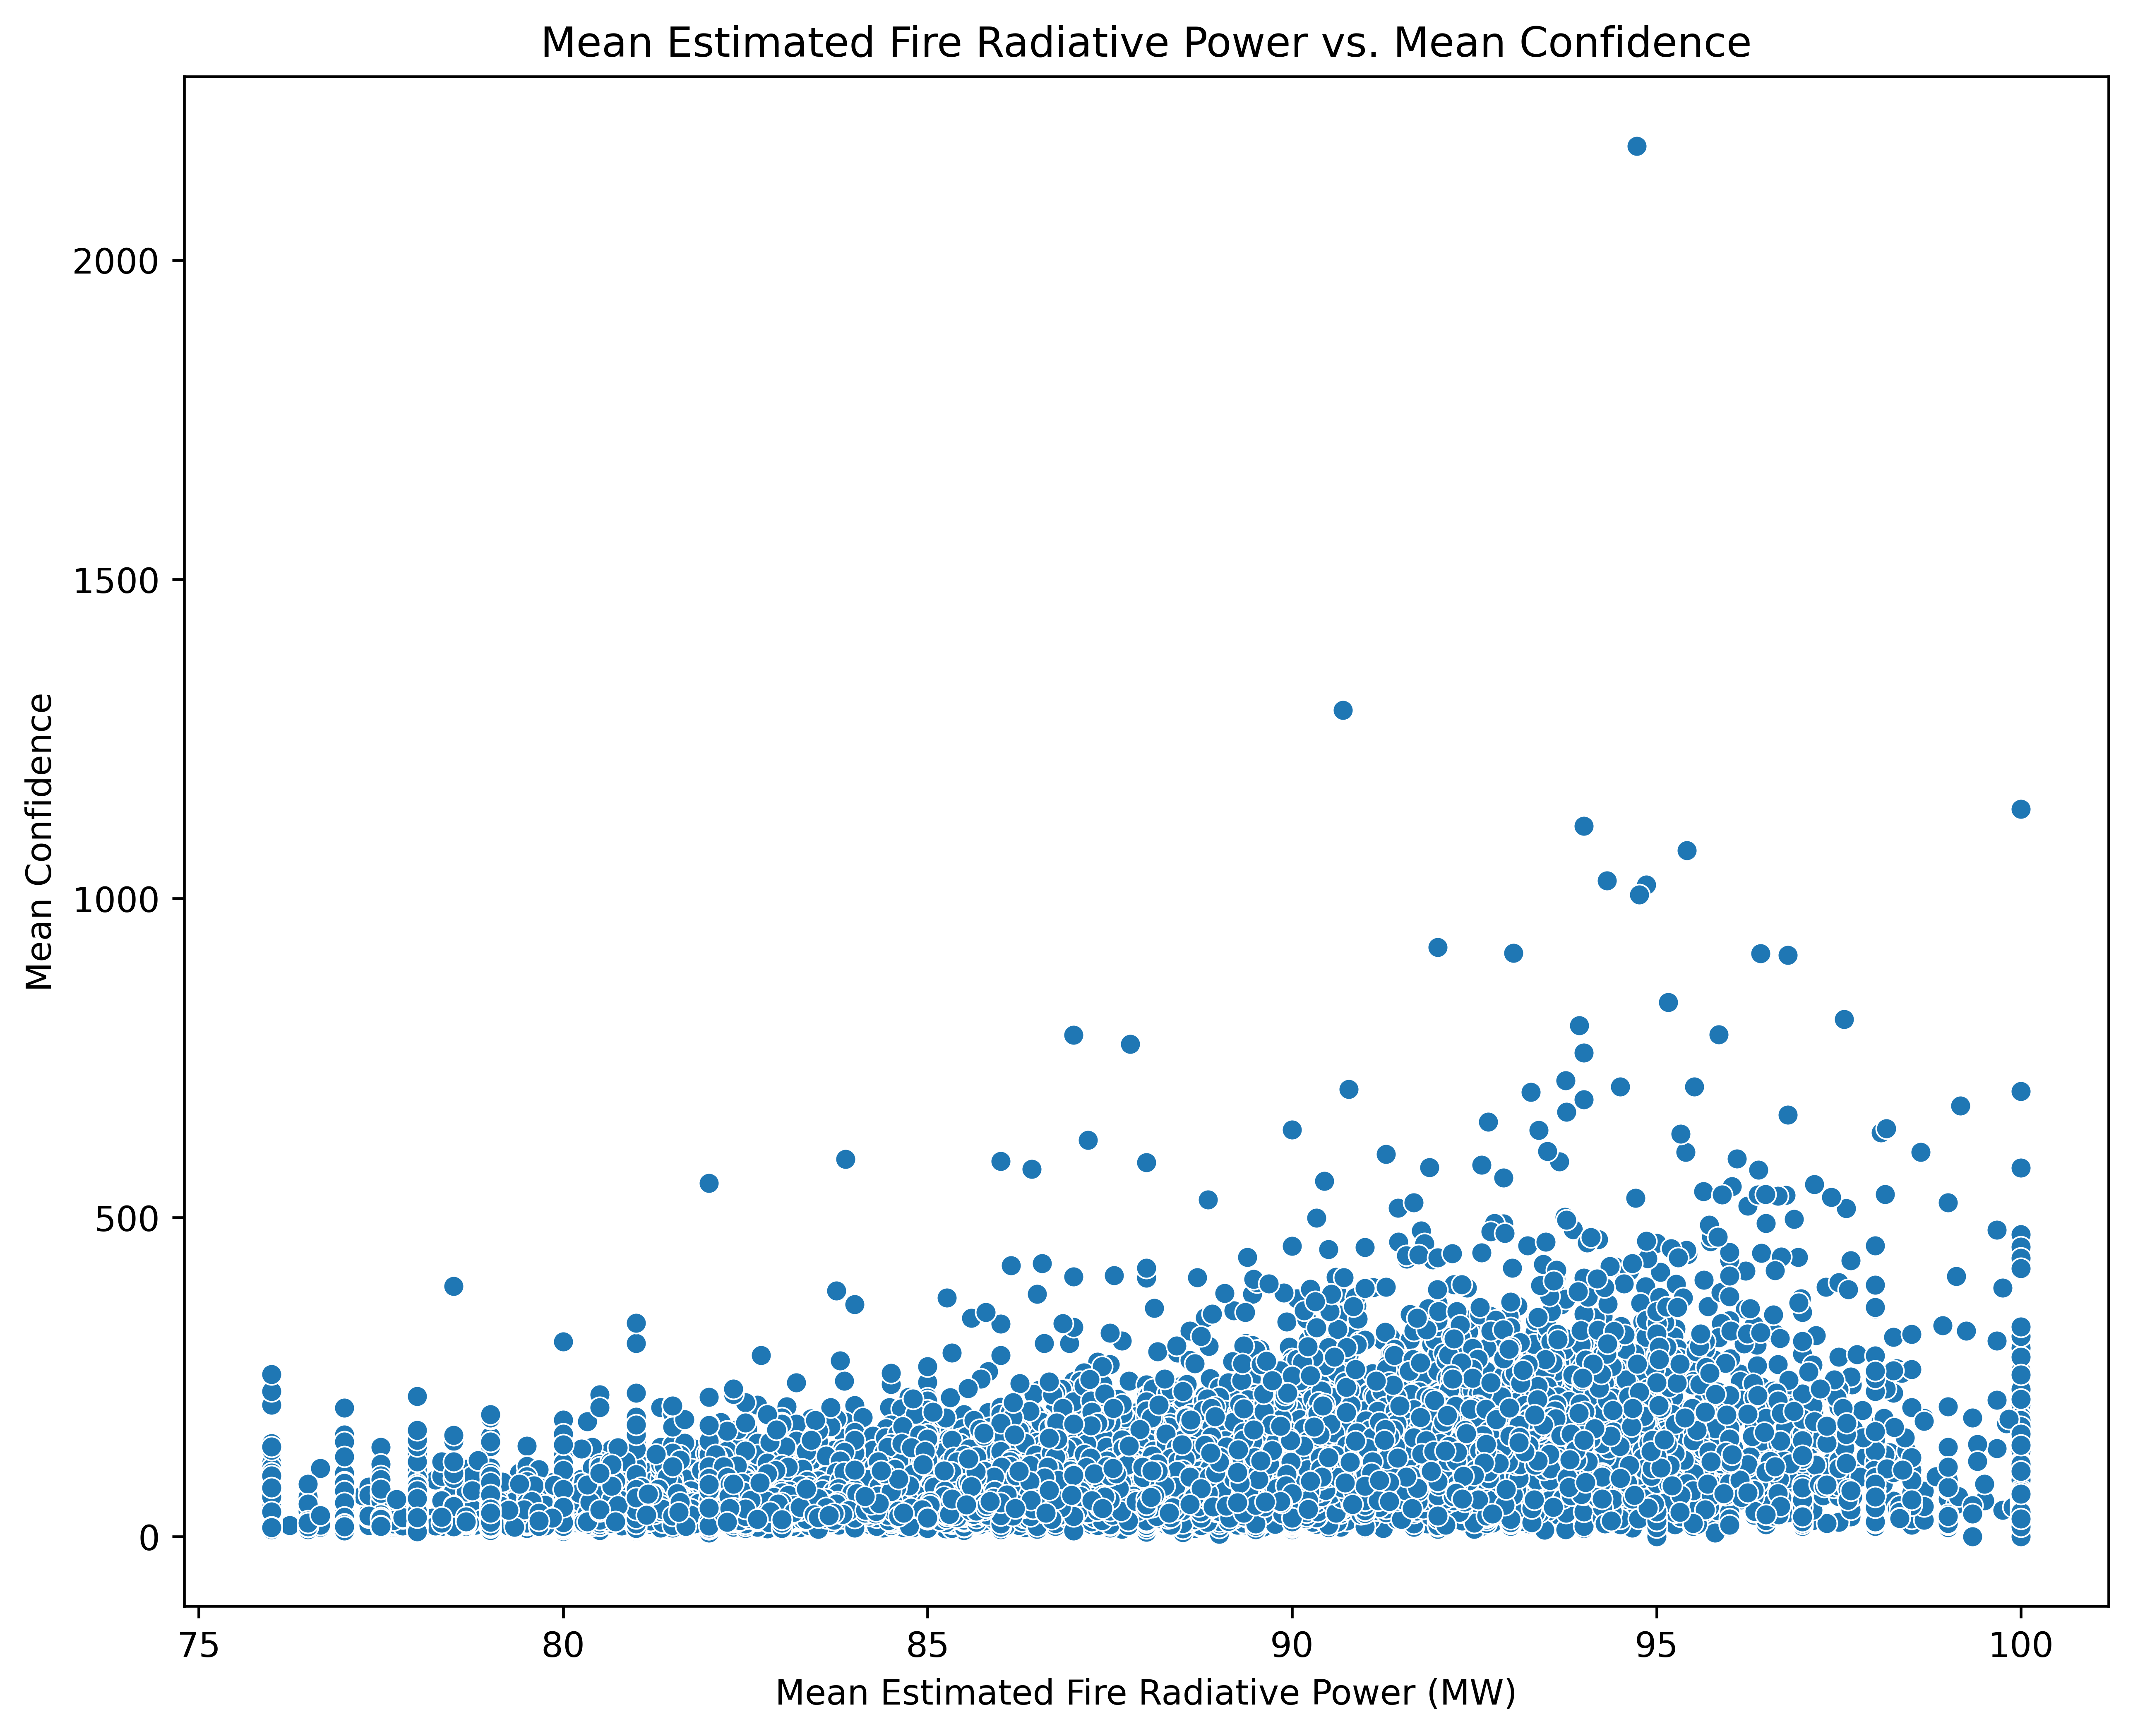

<Figure size 640x480 with 0 Axes>

In [66]:
# Option-2 using Seaborn
# Creating a scatter plot to visualize the relationship between mean estimated fire radiative power and mean  confidence using Seaborn
plt.figure(figsize=(10, 8), dpi=600)
# Using sns.scatterplot to create the scatter plot
# Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')    
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')

plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()
plt.savefig('../../reports/australia_wildfire/Mean_Estimated_Fire_Radiative_Power_vs_Mean_Confidence.png', dpi=300, bbox_inches='tight')

In [68]:
region_data = {
    'region': ['NSW', 'QL', 'SA', 'TA', 'VI', 'WA', 'NT'],
    'Lat': [-31.8759835, -22.1646782, -30.5343665, -42.035067, -36.5986096, -25.2303005, -19.491411],
    'Lon': [147.2869493, 144.5844903, 135.6301212, 146.6366887, 144.6780052, 121.0187246, 132.550964]
}
reg = pd.DataFrame(region_data)

# Create Folium Map
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# Feature Group
aus_reg = folium.FeatureGroup(name="Australian Regions")

# Loop to add CircleMarkers
for _, row in reg.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=6,
        popup=folium.Popup(row['region'], parse_html=True),
        tooltip=row['region'],
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(aus_reg)

# Add Feature Group to Map
aus_reg.add_to(Aus_map)

# Add layer control
folium.LayerControl().add_to(Aus_map)

# Save map
Aus_map.save('../../reports/australia_wildfire/Australia_Wildfire_Incidents_Map.html')

# Display
Aus_map

In [ ]:
# Australia Wildfire Visualisation using Folium Plugins Showing Total Number of Incidents
region_data = {
    'region': ['NSW', 'QL', 'SA', 'TA', 'VI', 'WA', 'NT'],
    'Lat': [-31.8759835, -22.1646782, -30.5343665, -42.035067, -36.5986096, -25.2303005, -19.491411],
    'Lon': [147.2869493, 144.5844903, 135.6301212, 146.6366887, 144.6780052, 121.0187246, 132.550964],
    'wildfire_count': [50, 30, 20, 10, 40, 25, 15]
}
reg = pd.DataFrame(region_data)

# Create map
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# Optional: Use MarkerCluster if you're adding many points
cluster = MarkerCluster(name="Wildfire Cluster").add_to(Aus_map)

# Loop through and add markers with dynamic popup
for _, row in reg.iterrows():
    popup_html = f"""
    <strong>Region:</strong> {row['region']}<br>
    <strong>Wildfire Incidents:</strong> {row['wildfire_count']}
    """
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=7,
        popup=folium.Popup(popup_html, max_width=300),
        tooltip=f"{row['region']}: {row['wildfire_count']} incidents",
        color='darkred',
        fill=True,
        fill_color='orange',
        fill_opacity=0.7
    ).add_to(cluster)

# Add layer control
folium.LayerControl().add_to(Aus_map)

# Save map
Aus_map.save('../../reports/australia_wildfire/Australia_Wildfire_Incidents_Map.html')

# Display map
Aus_map

In [73]:
# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)
# Loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    folium.Marker(
        location=[lat, lng],
        popup=lab,
        icon=folium.Icon(color='blue')
    ).add_to(Aus_map)
# Save map to html file
Aus_map.save('../../reports/australia_wildfire/Australia_Wildfire_Incidents_Map1.html')
# Display the map
Aus_map